In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time


# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble, ClassicalRegister, QuantumRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi 
from qiskit.extensions import UnitaryGate
from qiskit.extensions import HamiltonianGate
from qiskit.circuit.library import PhaseEstimation
from qiskit.algorithms import HamiltonianPhaseEstimation
 

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

# import basic plot tools
from qiskit.visualization import plot_histogram

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [5]:
H =    [[10.02124668, -0.0256,     -0.0256,     -0.0256    ],
         [-0.0256,     13.89359416,  0.,          0.        ],
         [-0.0256,      0.,          8.31720022,  0.        ],
         [-0.0256,      0.,          0.,          8.33233701]]


In [6]:
U = HamiltonianGate(H,2*np.pi,label="CU") #
print(U)

Instruction(name='hamiltonian', num_qubits=2, num_clbits=0, params=[array([[10.02124668+0.j, -0.0256    +0.j, -0.0256    +0.j,
        -0.0256    +0.j],
       [-0.0256    +0.j, 13.89359416+0.j,  0.        +0.j,
         0.        +0.j],
       [-0.0256    +0.j,  0.        +0.j,  8.31720022+0.j,
         0.        +0.j],
       [-0.0256    +0.j,  0.        +0.j,  0.        +0.j,
         8.33233701+0.j]]), 6.283185307179586])


In [7]:
#HamiltonianPhaseEstimation(U)

In [8]:
qpe = QuantumCircuit(8, 6)
#qpe.draw(scale=2)

In [9]:
for qubit in range(7):
    qpe.h(qubit)
#qpe.draw(scale=2)

In [10]:
#PhaseEstimation(3,U)

In [11]:
CU = U.control(label="control")
print(CU)

Instruction(name='chamiltonian', num_qubits=3, num_clbits=0, params=[array([[10.02124668+0.j, -0.0256    +0.j, -0.0256    +0.j,
        -0.0256    +0.j],
       [-0.0256    +0.j, 13.89359416+0.j,  0.        +0.j,
         0.        +0.j],
       [-0.0256    +0.j,  0.        +0.j,  8.31720022+0.j,
         0.        +0.j],
       [-0.0256    +0.j,  0.        +0.j,  0.        +0.j,
         8.33233701+0.j]]), 6.283185307179586])


In [12]:
repetitions = 1
#CU = U#.to_gate().control(1)
for counting_qubit in range(6):
    for i in range(repetitions):
        qpe.append(CU,[counting_qubit,6,7])
        #qpe.cp(math.pi/4, counting_qubit, 3); # This is CU
    repetitions *= 2
#qpe.draw(scale=1.5)

In [13]:
#straight from the tutorial:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [14]:
qpe.barrier()
# Apply inverse QFT
qft_dagger(qpe, 6)
# Measure
qpe.barrier()
for n in range(6):
    qpe.measure(n,n)

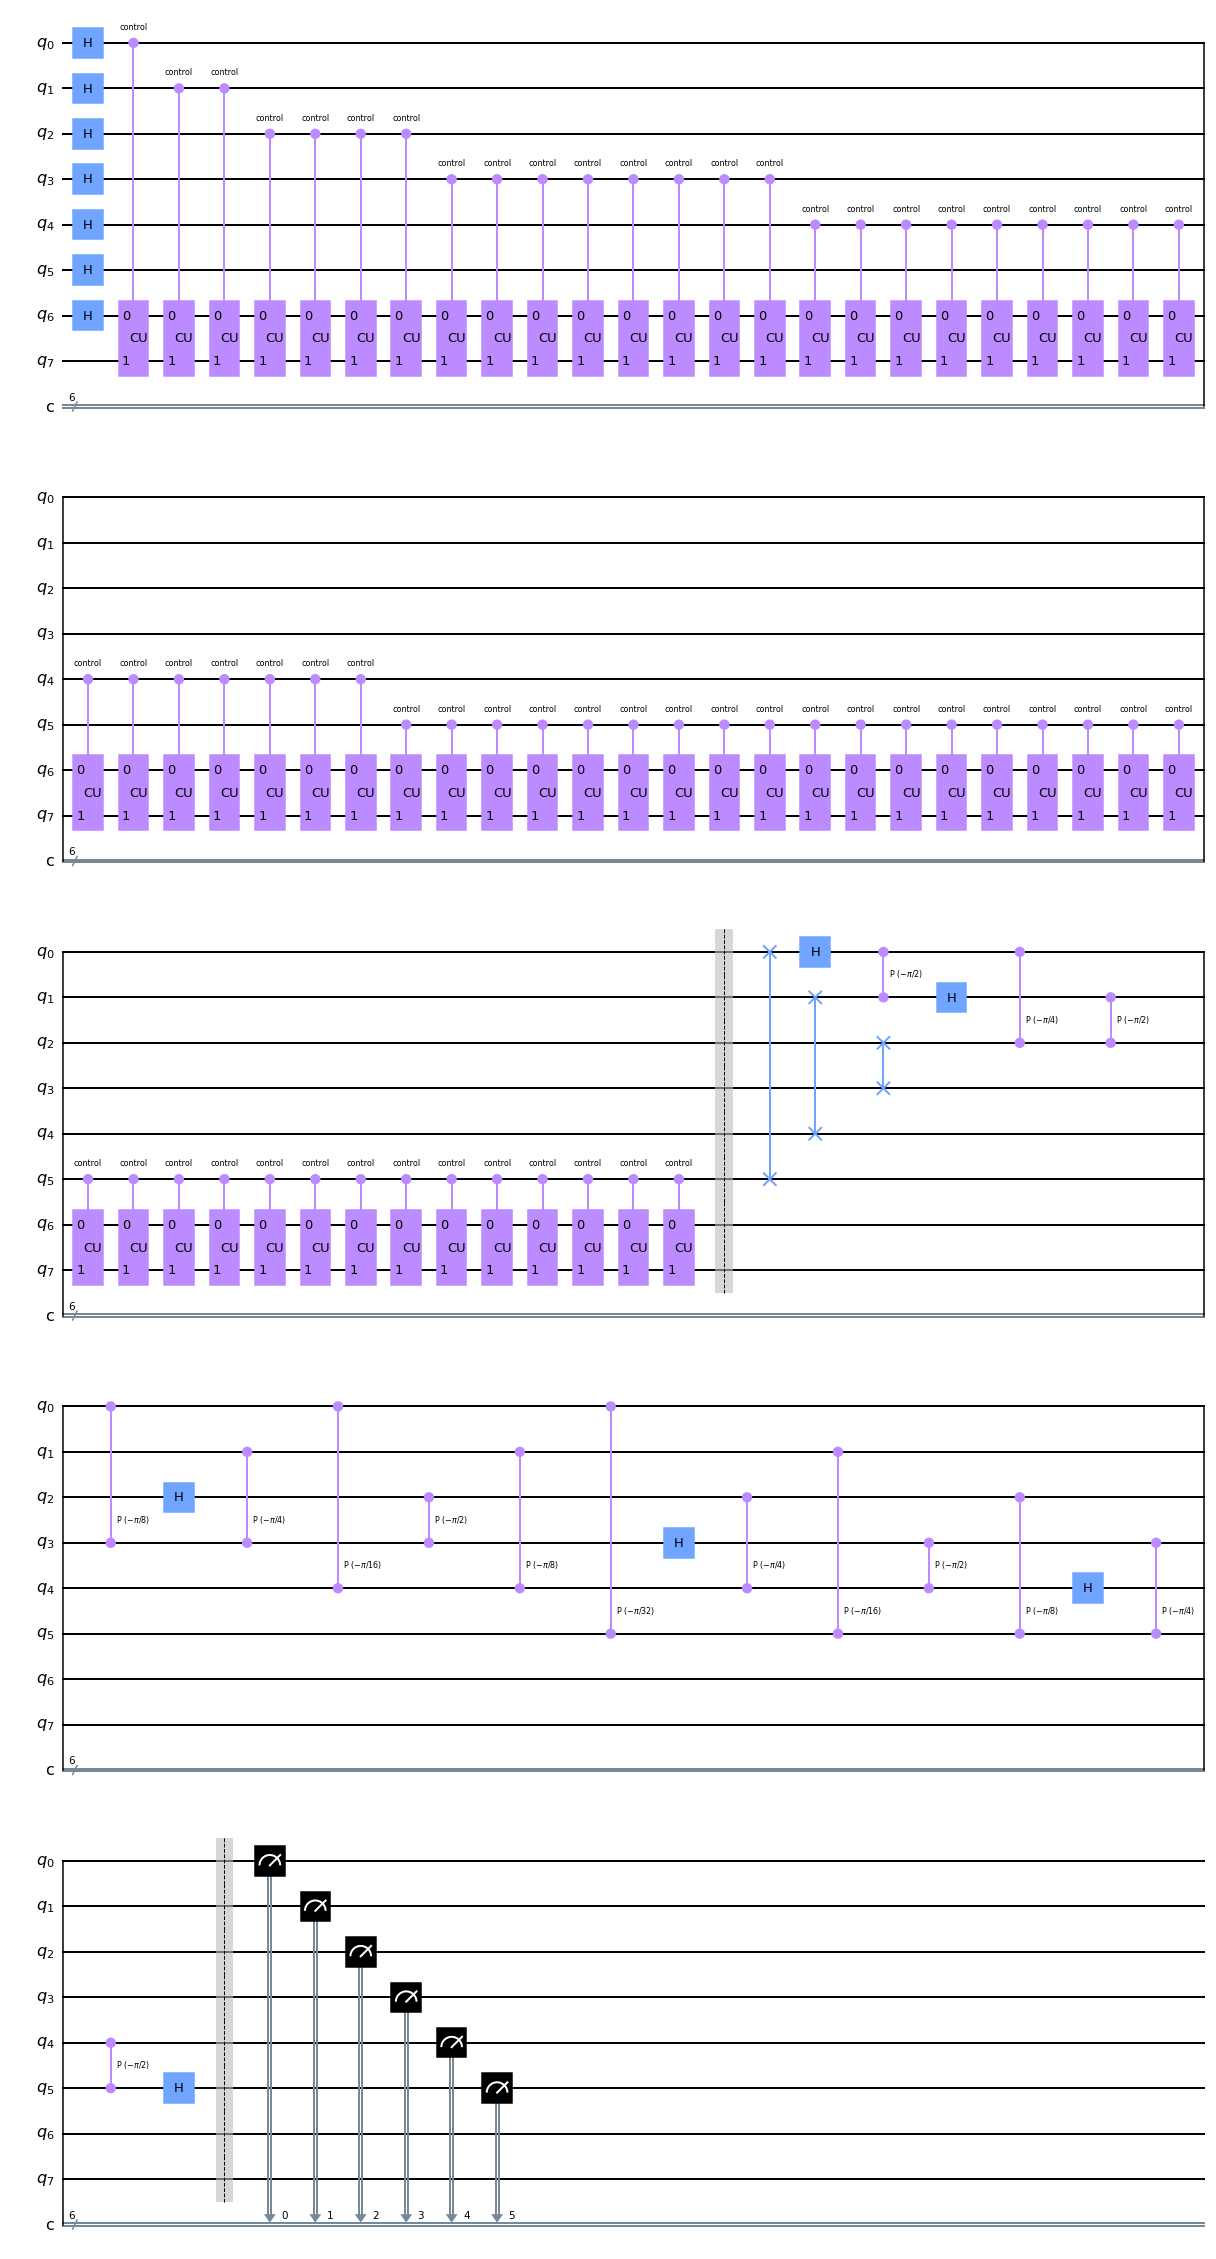

In [15]:
qpe.draw()

--- 0.3310384750366211 seconds ---


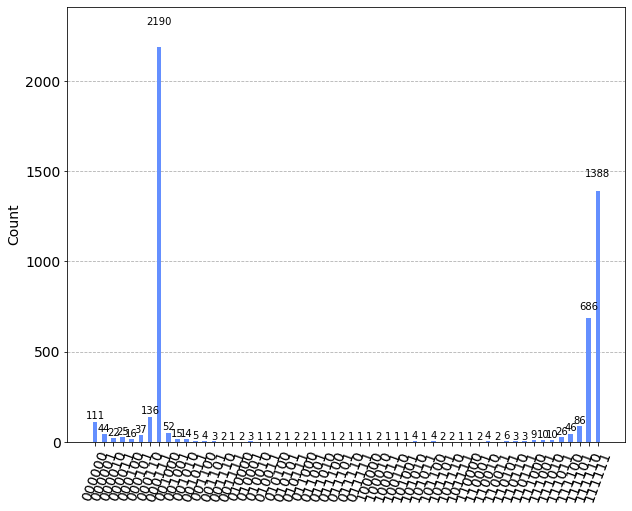

In [16]:
start_time = time.time()
aer_sim = Aer.get_backend('aer_simulator')
shots = 5000#2048
t_qpe = transpile(qpe, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
print("--- %s seconds ---" % (time.time() - start_time))
plot_histogram(answer,figsize=(10,8))


In [17]:
print(answer)

{'010010': 1, '101111': 1, '110001': 2, '110111': 3, '011000': 2, '001110': 2, '101101': 2, '110000': 1, '100011': 1, '110010': 4, '011010': 1, '010101': 1, '110011': 2, '001001': 15, '111010': 10, '101011': 1, '000101': 37, '101110': 2, '001010': 14, '010111': 2, '010100': 2, '111011': 26, '011100': 1, '111100': 46, '011001': 1, '000000': 111, '010001': 3, '111110': 686, '000110': 136, '000001': 44, '011110': 1, '100010': 2, '000111': 2190, '111000': 9, '110101': 6, '111101': 86, '001000': 52, '001100': 4, '111111': 1388, '000100': 16, '001111': 1, '101010': 4, '101100': 4, '011111': 1, '010011': 1, '100110': 1, '010000': 2, '111001': 10, '101001': 1, '011101': 2, '000010': 22, '110110': 3, '001011': 5, '000011': 25, '100000': 1, '001101': 3}


In [26]:
print(max(answer, key=answer.get))

000111100


In [27]:
print(sorted(answer, key=answer.get, reverse=True)[0:8])

['000111100', '001000110', '101100011', '101100010', '111110001', '001000101', '111110000', '001000111']


In [28]:
myList = sorted(answer, key=answer.get, reverse=True)[0:8]
output_list = []
for element in myList:
    value = int(element,2)
    output_list.append(value)
print("The input list is:", myList)
print("The output list is:", sorted(output_list))

The input list is: ['000111100', '001000110', '101100011', '101100010', '111110001', '001000101', '111110000', '001000111']
The output list is: [60, 69, 70, 71, 354, 355, 496, 497]
